<a href="https://colab.research.google.com/github/debnathch/boombikes_sharing_linerReg/blob/main/boombikes_sharing_assignmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [485]:
#import numpy and pandas
import numpy as np
import pandas as pd

#import EDA related lib
import matplotlib.pyplot as plt
import seaborn as sns

#import linear regression model lib
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import sklearn lib
import sklearn
# split of training data and test data
from sklearn.model_selection import train_test_split
#normalization lib
from sklearn.preprocessing import MinMaxScaler
# # import linear regression lib
# from sklearn.linear_model import LinearRegression

# #import metrics lib
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score


#Step 1: Reading and Understanding the Data

In [486]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [487]:
# dimensions of the data (number of rows and columns)
df.shape

(730, 16)

In [488]:
# describing the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [489]:
#show the column
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#Step 2: Visualising the Data

##Visualising Numeric Variables : Using a pairplot

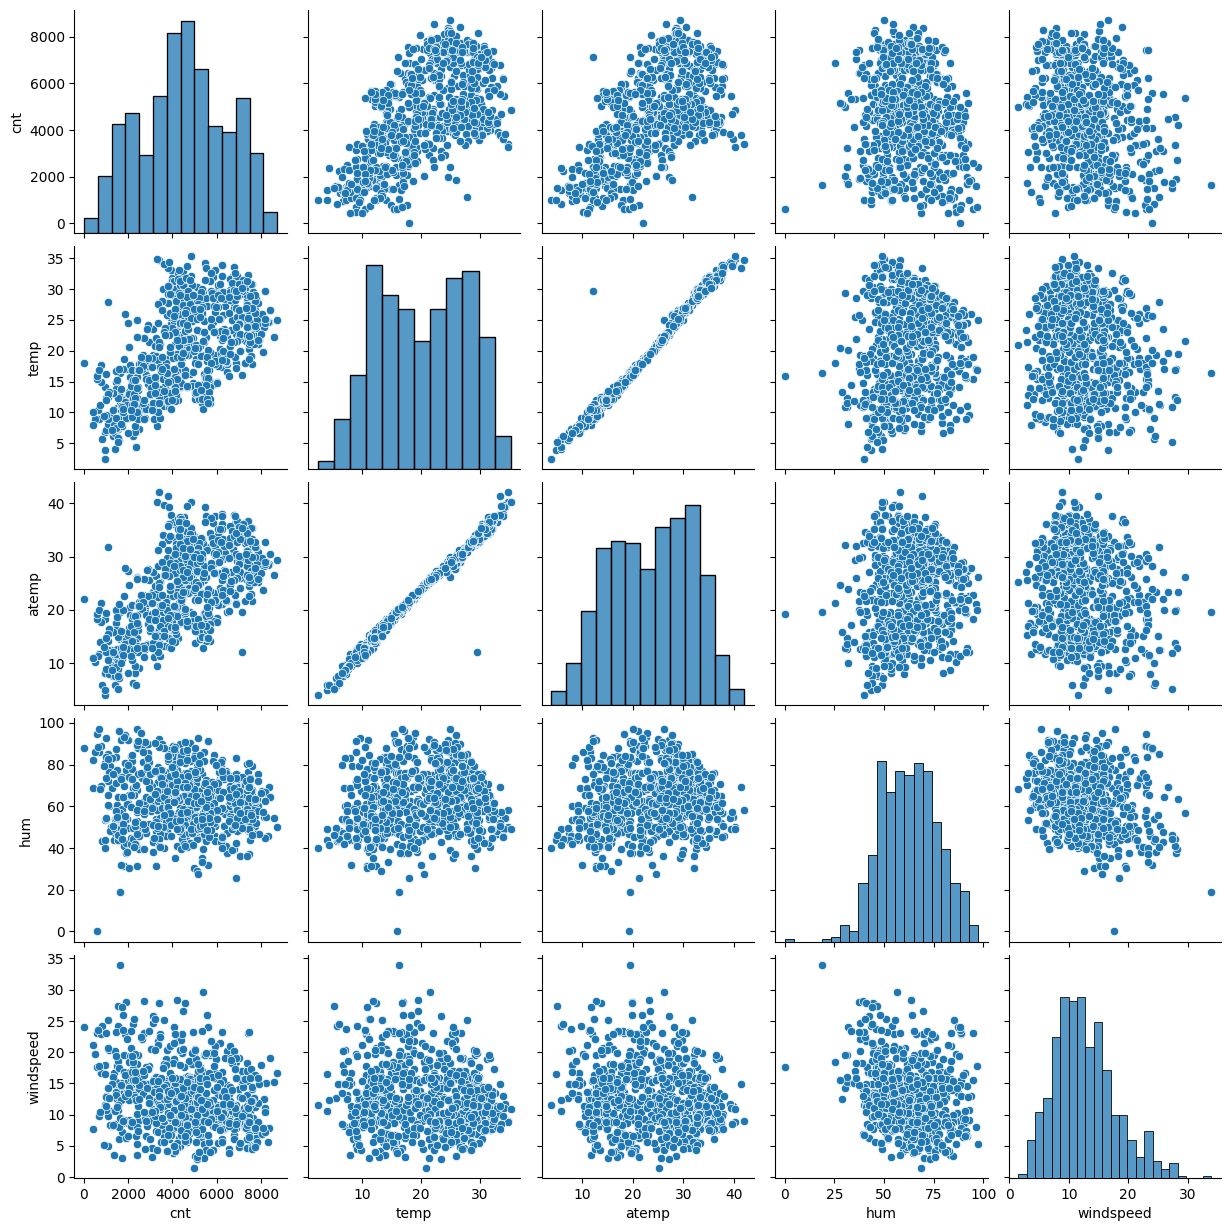

In [491]:
sns.pairplot(data=df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#Step 3: Data Preparation

In [492]:
#converting seasons values from 1,2,3,4 to spring,summer,fall,winter resp.
def ass_seasons(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

In [493]:
df.season.value_counts()

,count
season,
3,188
2,184
1,180
4,178


In [494]:
#df['season']=df['season'].apply(ass_seasons)
df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [495]:
df.season.value_counts()

,count
season,
Fall,188
Summer,184
Spring,180
Winter,178


In [496]:
# contverting mnth values from 1-12 to jan-dec
def ass_mnth(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [497]:
df.mnth=df[['mnth']].apply(ass_mnth)

In [498]:
df.mnth.value_counts()

,count
mnth,
jan,62
mar,62
may,62
jul,62
aug,62
oct,62
dec,62
apr,60
jun,60


In [499]:
df.weekday.value_counts()

,count
weekday,
6,105
0,105
1,105
2,104
4,104
5,104
3,103


In [500]:
# converting day of the week from 0-6 to sun-sat
def ass_weekdays(x):
    return x.map({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'})

In [501]:
df.weekday=df[['weekday']].apply(ass_weekdays)

In [502]:
df.weekday.value_counts()

,count
weekday,
sat,105
sun,105
mon,105
tues,104
thurs,104
fri,104
wed,103


In [503]:
#convereting the weather varible as 1,2,3,4 to clear, mist , snow , rainy.
def ass_weather(x):
    return x.map ({1:'clear', 2:'mist', 3:'snow', 4:'rainy'})

In [504]:
df[['weathersit']]=df[['weathersit']].apply(ass_weather)

In [505]:
df.weathersit.value_counts()

,count
weathersit,
clear,463
mist,246
snow,21


Data Visualization


temp, atemp ,hum and cnt displot

<ipython-input-506-aefcf6787403>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'])


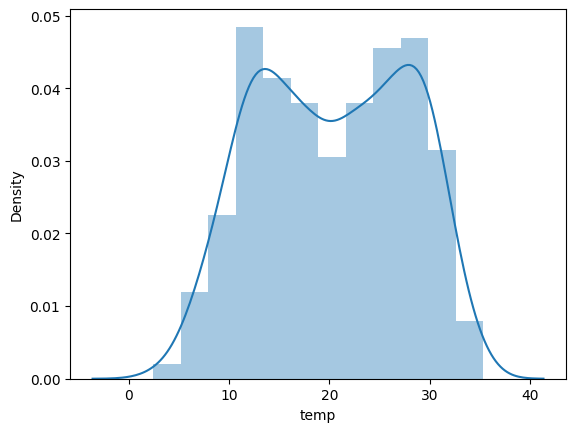

In [506]:
# temp - show
sns.distplot(df['temp'])



plt.show();

<ipython-input-507-e9ffad89f755>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hum'])


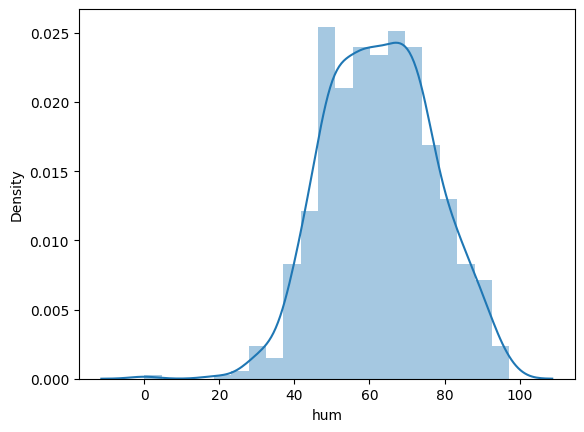

In [507]:
#Hum show
sns.distplot(df['hum'])
plt.show();

<ipython-input-508-b7216a41ae80>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'])


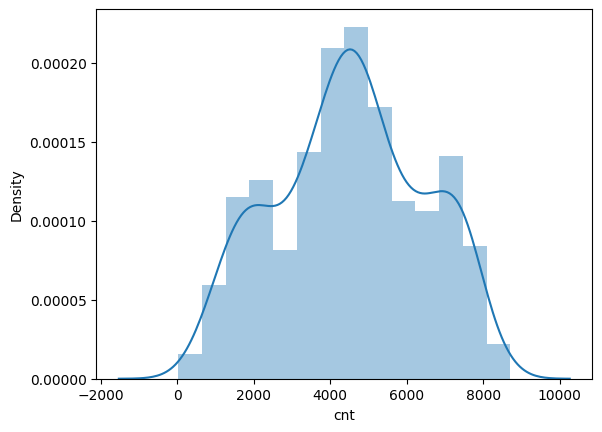

In [508]:
# cnt show

sns.distplot(df['cnt'])
plt.show();

<ipython-input-509-3e91b07ee323>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['atemp'])


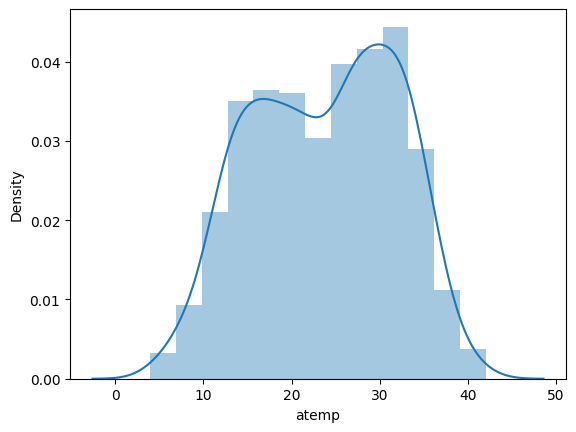

In [509]:
sns.distplot(df['atemp'])
plt.show();

Data info collection and prepare data

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [511]:
df['dteday']=df['dteday'].astype('datetime64[ns]')
df.dteday

,dteday
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
...,...
725,2019-12-27
726,2019-12-28
727,2019-12-29
728,2019-12-30


Visulaizing Categorical variable

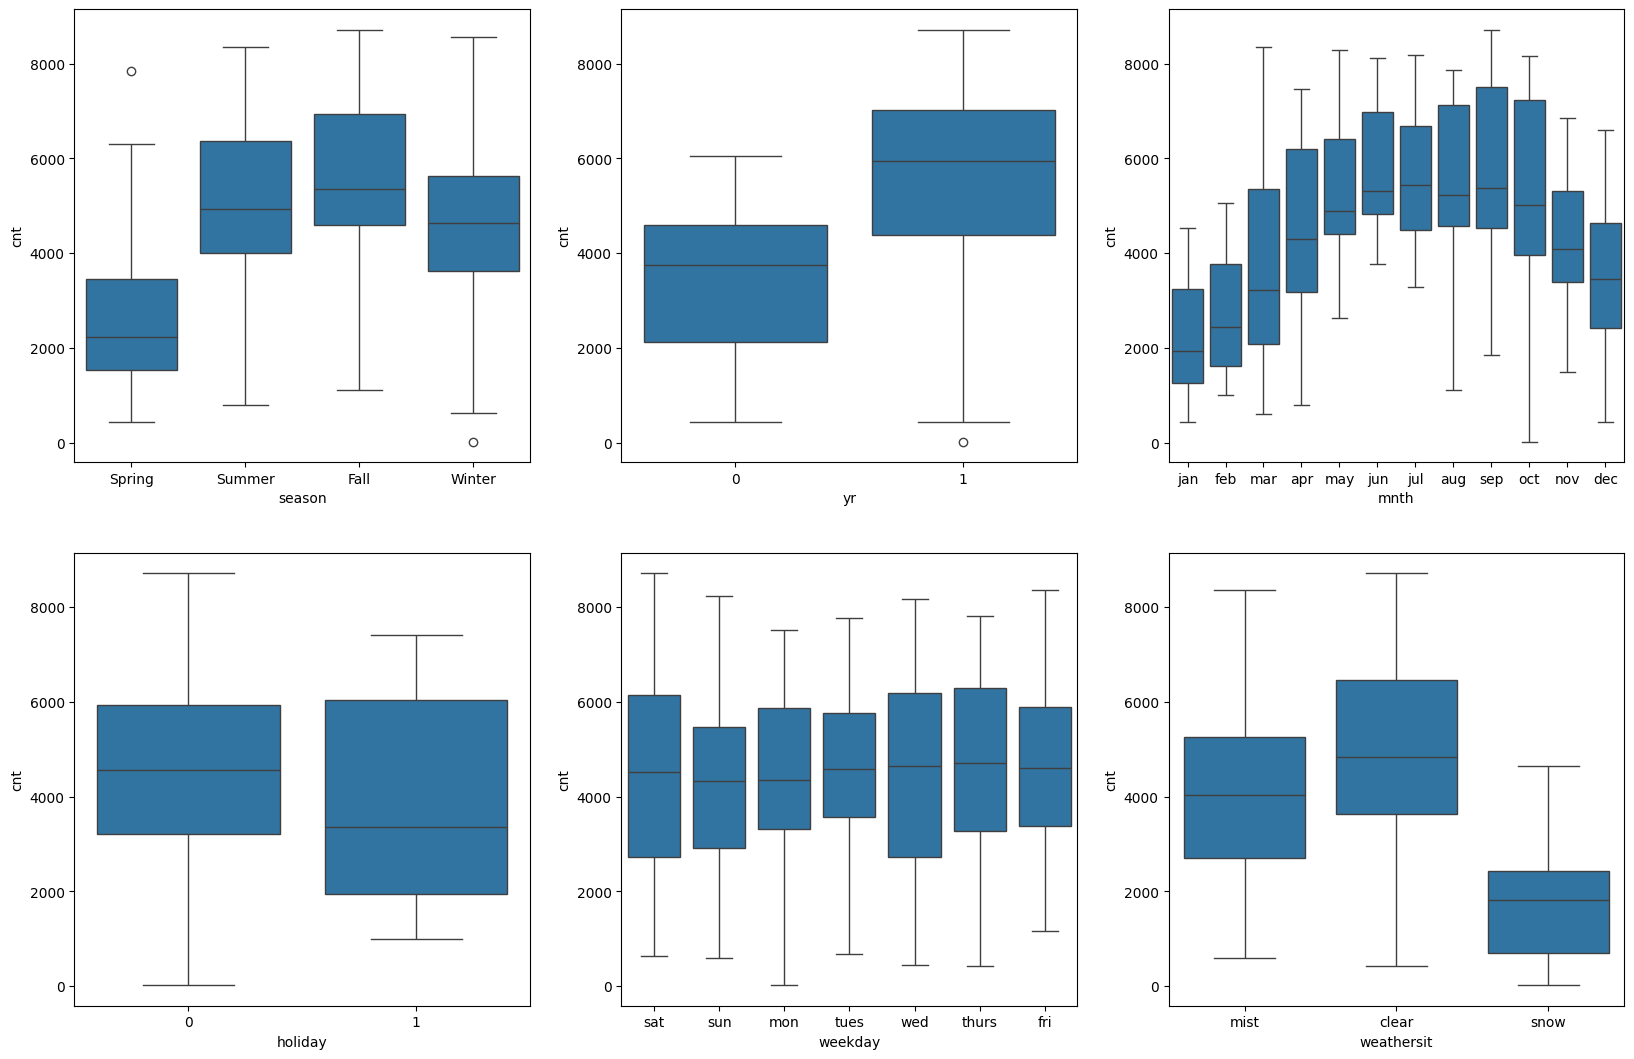

In [512]:
#visualizing categorical variables
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season', y='cnt',data=df)
plt.subplot(332)
sns.boxplot(x='yr', y='cnt',data=df)
plt.subplot(333)
sns.boxplot(x='mnth', y='cnt',data=df)
plt.subplot(334)
sns.boxplot(x='holiday', y='cnt',data=df)
plt.subplot(335)
sns.boxplot(x='weekday', y='cnt',data=df)
plt.subplot(336)
sns.boxplot(x='weathersit', y='cnt',data=df)
plt.show();

1. As we can see in the cnt vs season boxplot there is a hike in demand in summer and fall season.
2. in 2019 there is a hike in demand of bikes.
3. in the cnt vs yr boxplot you can see a increase in demand from month of may which is supposed to be a holidays for childrens and teenagers.
4. week day is not showing and inconsistency over the week.
5. in cnt vs weather situation boxplot we can clearly see a drop in demand in the snow weather.

In [513]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,Spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,Spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,Spring,0,jan,0,tues,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,Spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Creating Dummy Variables

In [514]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy_var = df[['season','mnth','weekday','weathersit']]

In [515]:
dummy_var = pd.get_dummies(dummy_var,dtype=int,drop_first=True)

In [516]:
# Adding the dummy variables to the original dataset
df = pd.concat([dummy_var,df],axis = 1)

In [517]:
#Deleting the orginal columns season.weathersit,weekday,mnth

df.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

df.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [518]:
df.shape

(730, 34)

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season_Spring    730 non-null    int64         
 1   season_Summer    730 non-null    int64         
 2   season_Winter    730 non-null    int64         
 3   mnth_aug         730 non-null    int64         
 4   mnth_dec         730 non-null    int64         
 5   mnth_feb         730 non-null    int64         
 6   mnth_jan         730 non-null    int64         
 7   mnth_jul         730 non-null    int64         
 8   mnth_jun         730 non-null    int64         
 9   mnth_mar         730 non-null    int64         
 10  mnth_may         730 non-null    int64         
 11  mnth_nov         730 non-null    int64         
 12  mnth_oct         730 non-null    int64         
 13  mnth_sep         730 non-null    int64         
 14  weekday_mon      730 non-null    int64    

#Step 4: Splitting the Data into Training and Testing Sets

In [520]:
train_data, test_data = train_test_split(df, train_size = 0.7, random_state = 100)

In [521]:
print(train_data.shape)
print(test_data.shape)

(510, 34)
(220, 34)


#Step 5: Rescaling the Features

In [522]:
scaler = MinMaxScaler()

In [523]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

In [524]:
train_data.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.345824,0.318819,0.751824,0.380981,177,1506,0.191095


In [525]:
train_data.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,837.633333,3647.703922,0.513499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,700.000000,3657.000000,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,675.936359,1578.410906,0.224421


Checking the coefficients to see which variables are highly correlated

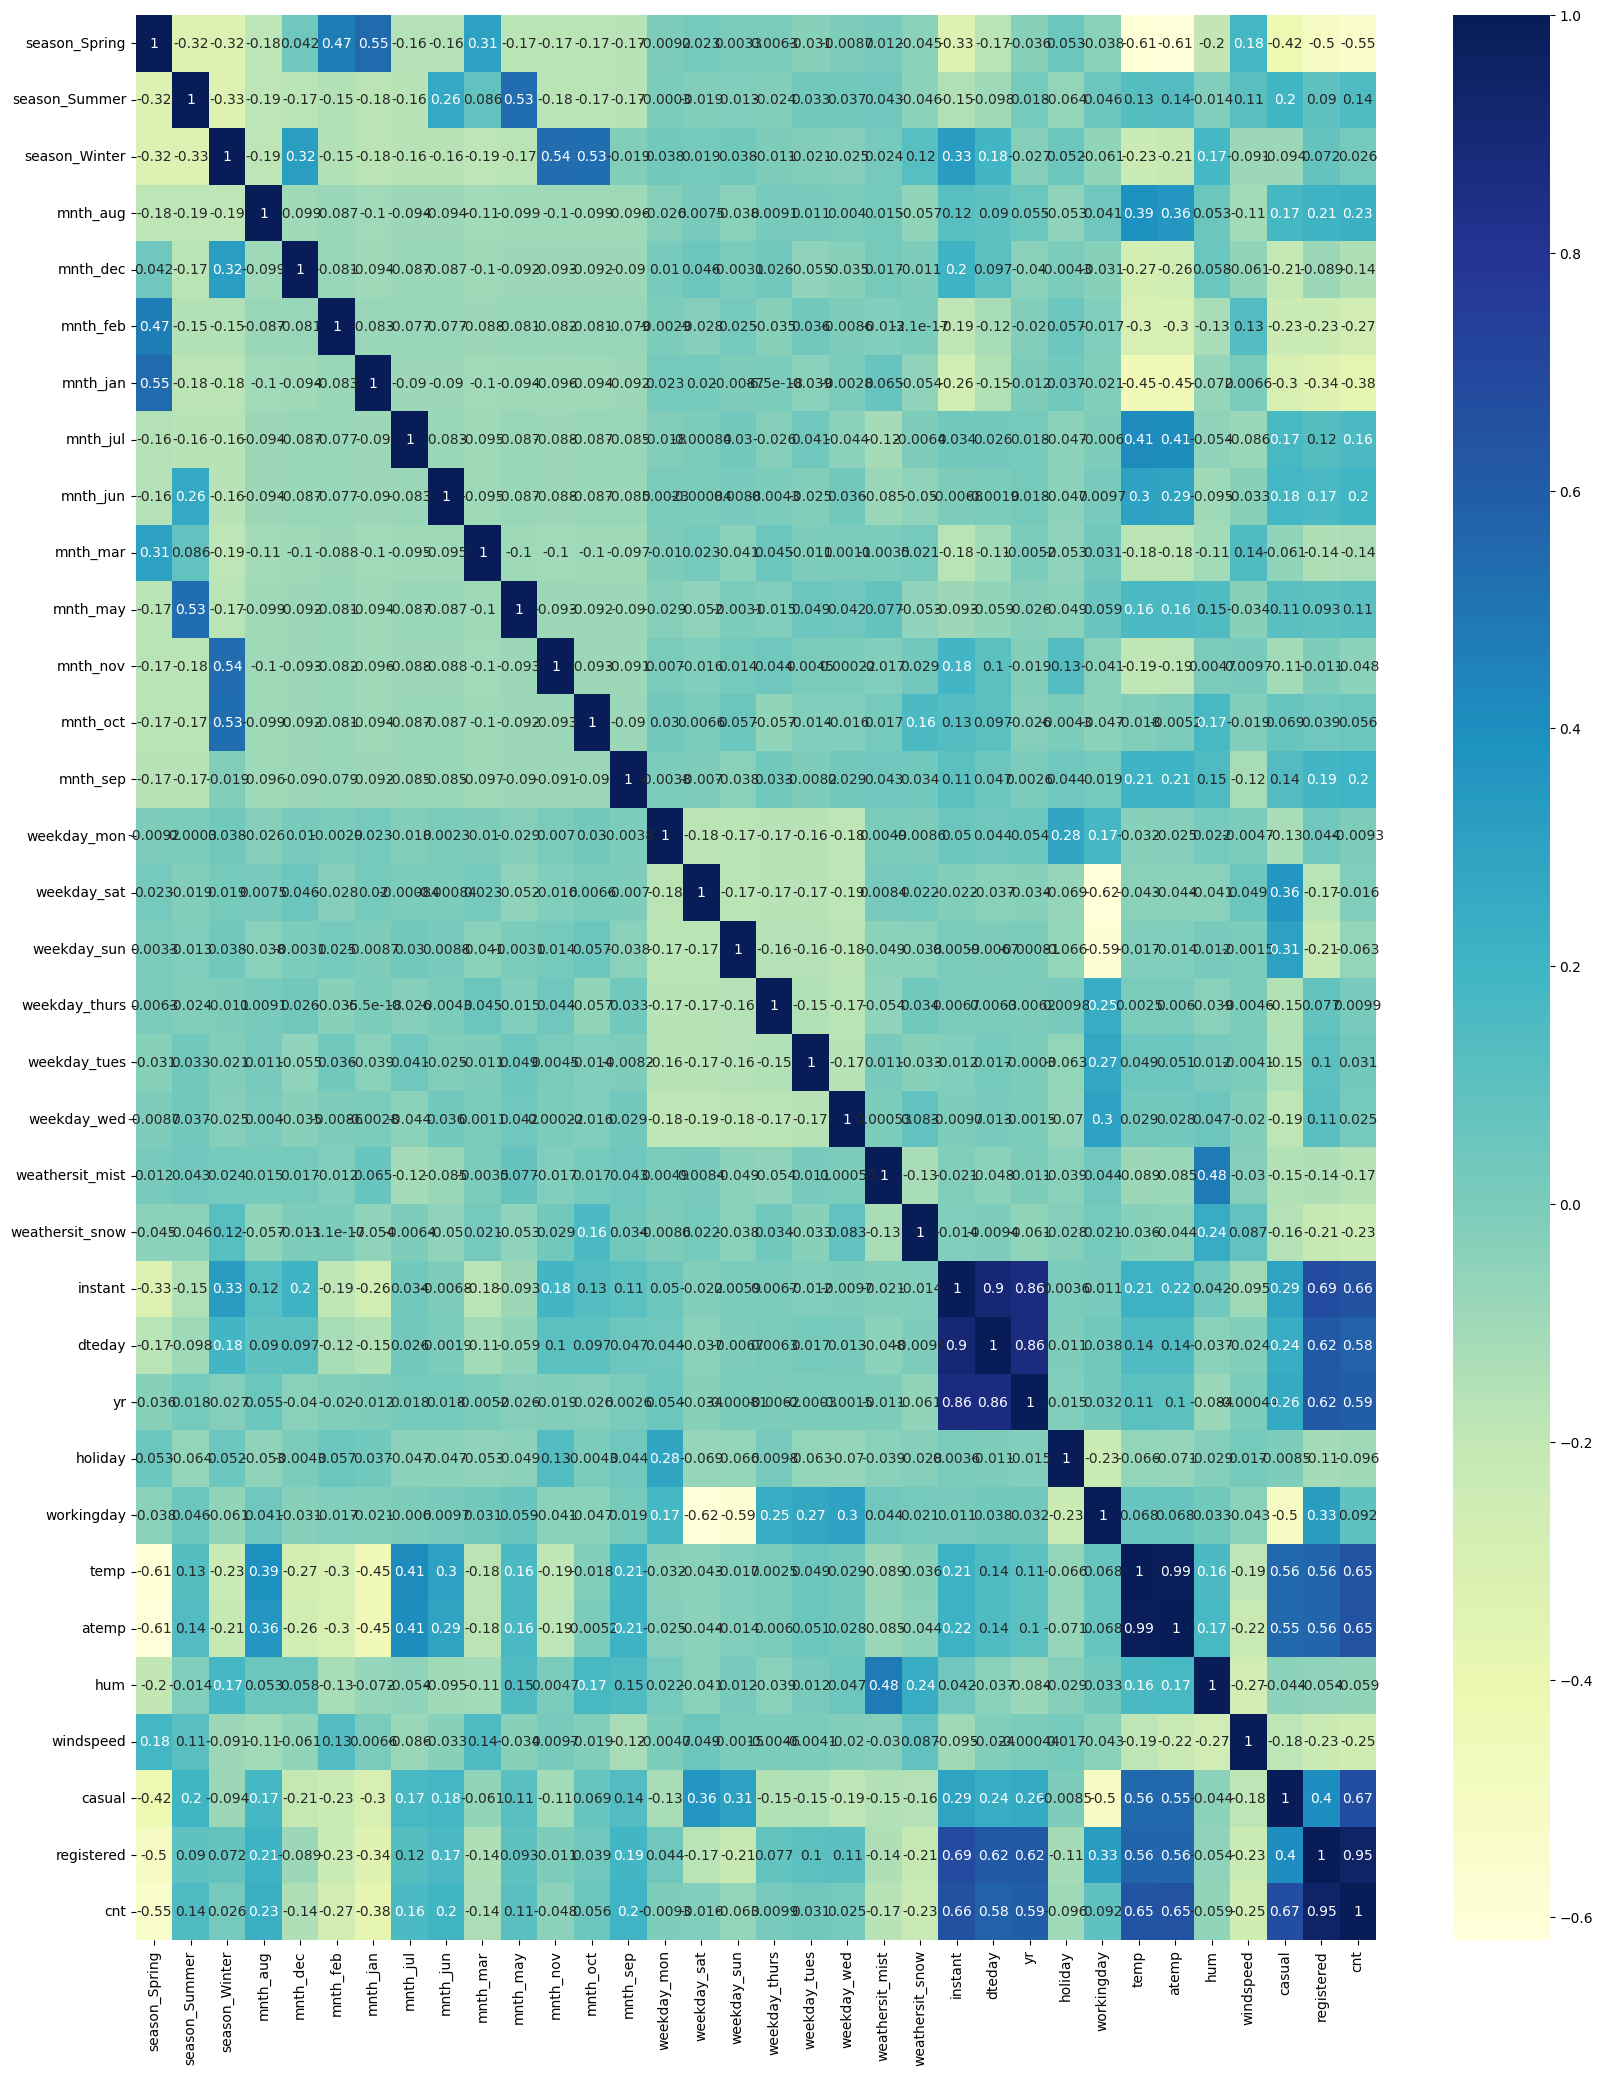

In [526]:
plt.figure(figsize = (20, 25))
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Dividing into X and Y sets for the model building

In [527]:
y_train = train_data.pop('cnt')
X_train = train_data

In [528]:
y_train.shape

(510,)

In [529]:
X_train.shape

(510, 33)

#Step 6: Building a linear model

Feature Selection

In [530]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [532]:
# Running RFE with the output number of the variable equal to 15

for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = pd.to_numeric(X_train[col])

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [533]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', False, 8),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 10),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 16),
 ('mnth_oct', False, 13),
 ('mnth_sep', False, 14),
 ('weekday_mon', False, 18),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 5),
 ('weekday_thurs', False, 4),
 ('weekday_tues', True, 1),
 ('weekday_wed', False, 7),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1),
 ('instant', False, 17),
 ('dteday', False, 19),
 ('yr', False, 3),
 ('holiday', False, 6),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', False, 9),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1)]

In [534]:
col = X_train.columns[rfe.support_]
col

Index(['season_Summer', 'season_Winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_mar', 'mnth_may', 'weekday_sat', 'weekday_tues',
       'weathersit_mist', 'weathersit_snow', 'temp', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [535]:
X_train.columns[~rfe.support_]

Index(['season_Spring', 'mnth_aug', 'mnth_jul', 'mnth_jun', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'weekday_mon', 'weekday_sun', 'weekday_thurs',
       'weekday_wed', 'instant', 'dteday', 'yr', 'holiday', 'workingday',
       'atemp', 'hum'],
      dtype='object')

Building model using statsmodel for the detailed statistics

In [536]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

Adding a constant variable

In [537]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

Building the first linear models using statsmodels

In [538]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.672e+31
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:20:08   Log-Likelihood:                 17743.
No. Observations:                 510   AIC:                        -3.545e+04
Df Residuals:                     494   BIC:                        -3.539e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0025   6.35e-17  -3.99e+13      0.000      -0.003      -0.003
season_Summer    2.481e-16   2.82e-17      8.808      0.000    1.93e-16    3.03e-16
season_Winter   -1.273e-16   3.07e-17     -4.141      0.000   -1.88e-16   -6.69e-17
mnth_dec         1.173e-16   3.76e-17      3.122      0.002    4.35e-17    1.91e-16
mnth_feb         2.138e-16   4.97e-17      4.303      0.000    1.16e-16    3.11e-16
mnth_jan         1.071e-16   5.11e-17      2.096      0.037    6.72e-18    2.08e-16
mnth_mar        -2.277e-17   3.68e-17     -0.619      0.536    -9.5e-17    4.95e-17
mnth_may        -2.394e-16   3.69e-17     -6.492      0.000   -3.12e-16   -1.67e-16
weekday_sat     -1.853e-16    2.8e-17     -6.628      0.000    -2.4e-16    -1.3e-16
weekday_tues     -1.11e-16    2.6e-17     -4.265      0.000   -1.62e-16   -5.99e-17
weathersit_mist -5.638e-17   1.87e-17     -3.011      0.003   -9.32e-17   -1.96e-17
weathersit_snow -4.424e-17   5.46e-17     -0.810      0.418   -1.51e-16     6.3e-17
temp             1.743e-16   7.92e-17      2.203      0.028    1.88e-17     3.3e-16
windspeed        1.362e-16   5.38e-17      2.533      0.012    3.05e-17    2.42e-16
casual              0.0001   1.91e-20   6.03e+15      0.000       0.000       0.000
registered          0.0001   7.39e-21   1.56e+16      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.218   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.223
Skew:                          -0.195   Prob(JB):                        0.121
Kurtosis:                       2.785   Cond. No.                     5.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking VIF for multicollinearity

In [539]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [540]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,14.06
14,registered,11.48
13,casual,5.86
12,windspeed,4.43
0,season_Summer,2.36
1,season_Winter,2.08
7,weekday_sat,1.68
9,weathersit_mist,1.63
6,mnth_may,1.60
4,mnth_jan,1.34


In general we want VIF to be less than 5. We will drop feature hum which has highest VIF of 30.89

In [542]:
# dropping season_Spring since its vif > 5

#X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

Model 2

In [543]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.672e+31
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:23:12   Log-Likelihood:                 17743.
No. Observations:                 510   AIC:                        -3.545e+04
Df Residuals:                     494   BIC:                        -3.539e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0025   6.35e-17  -3.99e+13      0.000      -0.003      -0.003
season_Summer    2.481e-16   2.82e-17      8.808      0.000    1.93e-16    3.03e-16
season_Winter   -1.273e-16   3.07e-17     -4.141      0.000   -1.88e-16   -6.69e-17
mnth_dec         1.173e-16   3.76e-17      3.122      0.002    4.35e-17    1.91e-16
mnth_feb         2.138e-16   4.97e-17      4.303      0.000    1.16e-16    3.11e-16
mnth_jan         1.071e-16   5.11e-17      2.096      0.037    6.72e-18    2.08e-16
mnth_mar        -2.277e-17   3.68e-17     -0.619      0.536    -9.5e-17    4.95e-17
mnth_may        -2.394e-16   3.69e-17     -6.492      0.000   -3.12e-16   -1.67e-16
weekday_sat     -1.853e-16    2.8e-17     -6.628      0.000    -2.4e-16    -1.3e-16
weekday_tues     -1.11e-16    2.6e-17     -4.265      0.000   -1.62e-16   -5.99e-17
weathersit_mist -5.638e-17   1.87e-17     -3.011      0.003   -9.32e-17   -1.96e-17
weathersit_snow -4.424e-17   5.46e-17     -0.810      0.418   -1.51e-16     6.3e-17
temp             1.743e-16   7.92e-17      2.203      0.028    1.88e-17     3.3e-16
windspeed        1.362e-16   5.38e-17      2.533      0.012    3.05e-17    2.42e-16
casual              0.0001   1.91e-20   6.03e+15      0.000       0.000       0.000
registered          0.0001   7.39e-21   1.56e+16      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.218   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.223
Skew:                          -0.195   Prob(JB):                        0.121
Kurtosis:                       2.785   Cond. No.                     5.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [544]:
  # Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,14.06
14,registered,11.48
13,casual,5.86
12,windspeed,4.43
0,season_Summer,2.36
1,season_Winter,2.08
7,weekday_sat,1.68
9,weathersit_mist,1.63
6,mnth_may,1.60
4,mnth_jan,1.34


#Step 7: Residual Analysis of the train data

In [545]:
y_train_pred = lm_2.predict(X_train_lm)

<ipython-input-546-8169499c9efa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


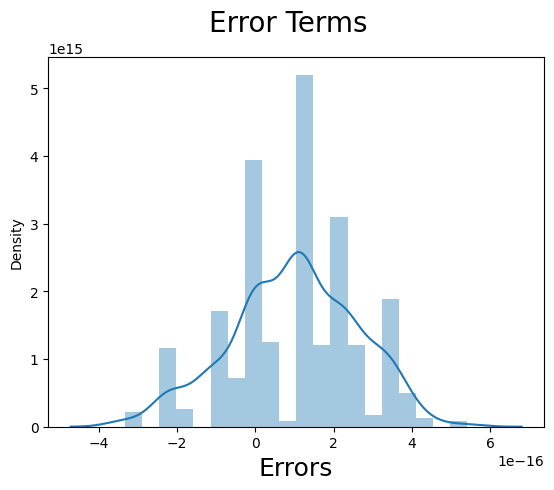

In [546]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

Cross-verifying the above conclusion using a qq-plot as well:

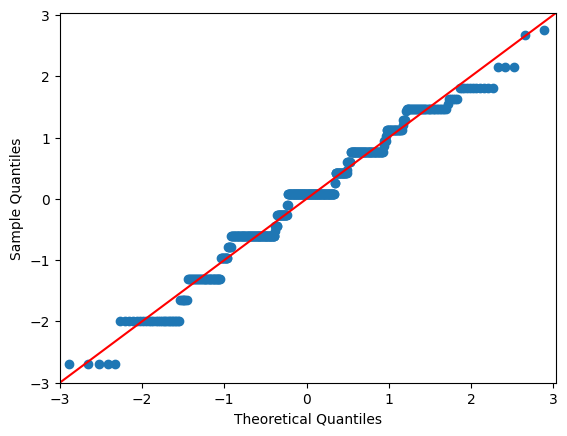

In [547]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Inference:
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

#Step 8: Making Predictions Using the Final Model

Applying the scaling on the test sets

In [550]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test_data[num_vars] = scaler.transform(test_data[num_vars])

In [555]:
test_data.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,2018-12-26 17:27:16.363636480,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,876.177273,3684.381818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018-01-02 00:00:00,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,9.000000,432.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018-07-07 12:00:00,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,338.250000,2507.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018-12-16 12:00:00,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,741.000000,3674.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2019-06-23 18:00:00,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,1189.000000,4640.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2019-12-31 00:00:00,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,3410.000000,6844.000000
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,NaN,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,711.161138,1518.870624


Dividing into X_test and y_test

In [559]:
test_data.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tues',
       'weekday_wed', 'weathersit_mist', 'weathersit_snow', 'instant',
       'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered'],
      dtype='object')

In [562]:
# y_test = test_data.pop('cnt')
X_test = test_data

In [563]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)

Calculating the r-squared

In [565]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 1.0
r2_score of test dataset 1.0


Inference:
We can see that the r_squared on the test set is 0.813 and the r-squared on the trained set 0.839 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

#Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

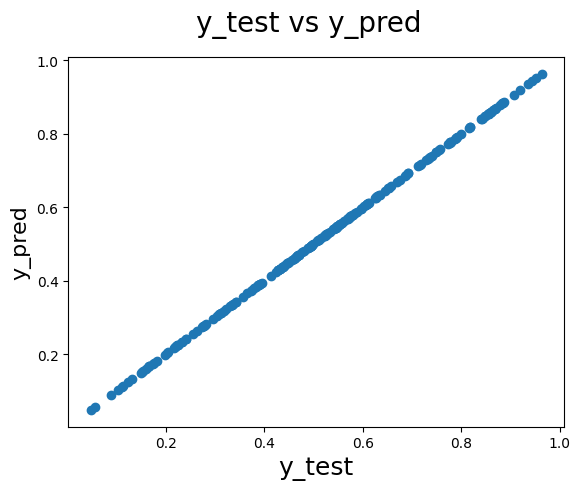

In [566]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Inference:
We can colude that the final model fit isn't by chance, and has descent predictive power.

Getting the variable names and the coefficient values for the final equation of the best fitted line

In [570]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,16))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
14,casual,1.150483e-04
15,registered,1.150483e-04
1,season_Summer,2.480655e-16
4,mnth_feb,2.138047e-16
12,temp,1.743397e-16
13,windspeed,1.361758e-16
3,mnth_dec,1.173107e-16
5,mnth_jan,1.071192e-16
6,mnth_mar,-2.276825e-17


Final Conclusions :By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

1. From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.

2. Coeffiencients of the variables explains the factors effecting the bike demand

3. Based on final model top three features contributing significantly towards explaining the demand are:

4. Temperature (0.438717)

5. weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.291749)

6. year (0.234455)

Hence, it can be clearly concluded that the variables temperature , season/ weather situation and month are significant in predicting the demand for shared bikes .


#Final Recommendations for the Company:

1. The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
2. With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
3. During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
4. Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.